## Imports

In [1]:
from __future__ import division
import sys
import os
import glob
import random

In [2]:
import pandas as pd
import numpy as np
import scipy
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.multitest import multipletests

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set()
sns.set_context('notebook', font_scale=1.2)
sns.set_style('white')

## Sample Info

For this study, we processed two sets of samples; one set of plasma samples from the Taizhou Longitudinal Study, and a second set of commercially purchsed normal and cancer tissue samples from BioChain.

### Taizhou Longitudinal Study

In [5]:
pre_diagnosis_samples = ['TSH-PL180123001', 'TSH-PL180123006', 'TSH-PL180123007', 'TSH-PL180123008', 'TSH-PL180123010', 'TSH-PL180123013', 'TSH-PL180123014', 'TSH-PL180123016', 'TSH-PL180123017', 'TSH-PL180123018', 'TSH-PL180123021', 'TSH-PL180123022', 'TSH-PL180123025', 'TSH-PL180123027', 'TSH-PL180123029', 'TSH-PL180123030', 'TSH-PL180123031', 'TSH-PL180123033', 'TSH-PL180513004', 'TSH-PL180513005', 'TSH-PL180513006', 'TSH-PL180513007', 'TSH-PL180513011', 'TSH-PL180513012', 'TSH-PL180513013', 'TSH-PL180513014', 'TSH-PL180513016', 'TSH-PL180513017', 'TSH-PL180513020', 'TSH-PL180513021', 'TSH-PL180513023', 'TSH-PL180513024', 'TSH-PL180513025', 'TSH-PL180513026', 'TSH-PL180513027', 'TSH-PL180513029', 'TSH-PL180513030', 'TSH-PL180513034', 'TSH-PL180513036', 'TSH-PL180513037', 'TSH-PL180513038', 'TSH-PL180513039', 'TSH-PL180513040', 'TSH-PL180513041', 'TSH-PL180513043', 'TSH-PL180513045', 'TSH-PL180513049', 'TSH-PL180513050', 'TSH-PL180513051', 'TSH-PL180513055', 'TSH-PL180513056', 'TSH-PL180513057', 'TSH-PL180513060', 'TSH-PL180513062', 'TSH-PL180513066', 'TSH-PL180513067', 'TSH-PL180513068', 'TSH-PL180513069', 'TSH-PL180513070', 'TSH-PL180513071', 'TSH-PL180513072', 'TSH-PL180513073', 'TSH-PL180513075', 'TSH-PL180513076', 'TSH-PL180513077', 'TSH-PL180513078', 'TSH-PL180513079', 'TSH-PL180513080', 'TSH-PL180513081', 'TSH-PL180513084', 'TSH-PL180513085', 'TSH-PL180513087', 'TSH-PL180513088', 'TSH-PL180513089', 'TSH-PL180513091', 'TSH-PL180513092', 'TSH-PL180513093', 'TSH-PL180513095', 'TSH-PL180513097', 'TSH-PL180513098', 'TSH-PL180513099', 'TSH-PL180513100', 'TSH-PL180513101', 'TSH-PL180513102', 'TSH-PL180513104', 'TSH-PL180513106', 'TSH-PL180513108', 'TSH-PL180513109', 'TSH-PL180513110', 'TSH-PL180513111', 'TSH-PL180513114', 'TSH-PL180513115', 'TSH-PL180513117', 'TSH-PL180513118', 'TSH-PL180513119', 'TSH-PL180513121', 'TSH-PL180513122', 'TSH-PL180513123', 'TSH-PL180513124', 'TSH-PL180513127', 'TSH-PL180513128', 'TSH-PL180513129', 'TSH-PL180516001', 'TSH-PL180516002', 'TSH-PL180516003', 'TSH-PL180516004', 'TSH-PL180516006', 'TSH-PL180516007', 'TSH-PL180516008', 'TSH-PL180516009', 'TSH-PL180516011', 'TSH-PL180516012', 'TSH-PL180516013', 'TSH-PL180516014', 'TSH-PL180516016', 'TSH-PL180516018', 'TSH-PL180516019', 'TSH-PL180516020', 'TSH-PL180516021', 'TSH-PL180516023', 'TSH-PL180516027', 'TSH-PL180516028', 'TSH-PL180516030', 'TSH-PL180516031', 'TSH-PL180516032', 'TSH-PL180516036', 'TSH-PL180516038', 'TSH-PL180516039', 'TSH-PL180516040', 'TSH-PL180516042', 'TSH-PL180516043', 'TSH-PL180516044', 'TSH-PL180516045', 'TSH-PL180516049', 'TSH-PL180516051', 'TSH-PL180516053', 'TSH-PL180516054', 'TSH-PL180516055', 'TSH-PL180516056', 'TSH-PL180516057', 'TSH-PL180516059', 'TSH-PL180516062', 'TSH-PL180516063', 'TSH-PL180123002', 'TSH-PL180123004', 'TSH-PL180123005', 'TSH-PL180123012', 'TSH-PL180123024', 'TSH-PL180123032', 'TSH-PL180513001', 'TSH-PL180513002', 'TSH-PL180513003', 'TSH-PL180513009', 'TSH-PL180513010', 'TSH-PL180513018', 'TSH-PL180513019', 'TSH-PL180513022', 'TSH-PL180513028', 'TSH-PL180513031', 'TSH-PL180513032', 'TSH-PL180513033', 'TSH-PL180513035', 'TSH-PL180513044', 'TSH-PL180513058', 'TSH-PL180513064', 'TSH-PL180513083', 'TSH-PL180513086', 'TSH-PL180513090', 'TSH-PL180513096', 'TSH-PL180513103', 'TSH-PL180513105', 'TSH-PL180513112', 'TSH-PL180513116', 'TSH-PL180513125', 'TSH-PL180516005', 'TSH-PL180516010', 'TSH-PL180516015', 'TSH-PL180516017', 'TSH-PL180516025', 'TSH-PL180516026', 'TSH-PL180516029', 'TSH-PL180516033', 'TSH-PL180516034', 'TSH-PL180516046', 'TSH-PL180516047', 'TSH-PL180516048', 'TSH-PL180516050', 'TSH-PL180516052', 'TSH-PL180516058', 'TSH-PL180516060', 'TSH-PL180516061']
post_diagnosis_samples = ['TSH-PL171221101', 'TSH-PL171221112', 'TSH-PL171221149', 'TSH-PL171221150', 'TSH-PL171221160', 'TSH-PL171221172', 'TSH-PL171221179', 'TSH-PL171221180', 'TSH-PL180504001', 'TSH-PL180504002', 'TSH-PL180504003', 'TSH-PL180504004', 'TSH-PL180504005', 'TSH-PL180504009', 'TSH-PL180504010', 'TSH-PL180504011', 'TSH-PL180504013', 'TSH-PL180504014', 'TSH-PL180504015', 'TSH-PL180504016', 'TSH-PL180504017', 'TSH-PL180504018', 'TSH-PL180504019', 'TSH-PL180504021', 'TSH-PL180504022', 'TSH-PL180504027', 'TSH-PL180504028', 'TSH-PL180504030', 'TSH-PL180504033', 'TSH-PL180504034', 'TSH-PL180504041', 'TSH-PL180504042', 'TSH-PL180504044', 'TSH-PL180504046', 'TSH-PL180504047', 'TSH-PL180504049', 'TSH-PL180504050', 'TSH-PL180504053', 'TSH-PL180504054', 'TSH-PL180504058', 'TSH-PL180504061', 'TSH-PL180504062', 'TSH-PL180504063', 'TSH-PL180504065', 'TSH-PL180504068', 'TSH-PL180504070', 'TSH-PL180504074', 'TSH-PL180504081', 'TSH-PL180504083', 'TSH-PL180504087', 'TSH-PL180504088', 'TSH-PL180504089', 'TSH-PL180504091', 'TSH-PL180504094', 'TSH-PL180504097', 'TSH-PL180504101', 'TSH-PL180504104', 'TSH-PL180504108', 'TSH-PL180504111', 'TSH-PL180504118', 'TSH-PL180508001', 'TSH-PL180508004', 'TSH-PL180508005', 'TSH-PL180508006', 'TSH-PL180508008', 'TSH-PL180508009', 'TSH-PL180508011', 'TSH-PL180508012', 'TSH-PL180508013', 'TSH-PL180508014', 'TSH-PL180508015', 'TSH-PL180508019', 'TSH-PL180508020', 'TSH-PL180508021', 'TSH-PL180508022', 'TSH-PL180508025', 'TSH-PL180508030', 'TSH-PL180508031', 'TSH-PL180508033', 'TSH-PL180508034', 'TSH-PL180508036', 'TSH-PL180508037', 'TSH-PL180508038', 'TSH-PL180508039', 'TSH-PL180508040', 'TSH-PL180508041', 'TSH-PL180508042', 'TSH-PL180508043', 'TSH-PL180508049', 'TSH-PL180508050', 'TSH-PL180508060', 'TSH-PL180508061', 'TSH-PL180508064', 'TSH-PL180508068', 'TSH-PL180508076', 'TSH-PL180508078', 'TSH-PL180508083', 'TSH-PL180508086', 'TSH-PL180508089', 'TSH-PL180510005', 'TSH-PL180510006', 'TSH-PL180510007', 'TSH-PL180510008', 'TSH-PL180510010', 'TSH-PL180510011', 'TSH-PL180510012', 'TSH-PL180510014', 'TSH-PL180510015', 'TSH-PL180510016', 'TSH-PL180510017', 'TSH-PL180510018', 'TSH-PL180510019', 'TSH-PL180510021', 'TSH-PL180510023', 'TSH-PL180510024', 'TSH-PL180510025', 'TSH-PL180510026', 'TSH-PL180510030', 'TSH-PL180510031', 'TSH-PL180510033', 'TSH-PL180510038', 'TSH-PL180510040', 'TSH-PL180510044', 'TSH-PL180510047', 'TSH-PL180510050', 'TSH-PL180510052', 'TSH-PL180510053', 'TSH-PL180510054', 'TSH-PL180510055', 'TSH-PL180510057', 'TSH-PL180510061', 'TSH-PL180510063', 'TSH-PL180510066', 'TSH-PL180510071', 'TSH-PL180510072', 'TSH-PL180510073', 'TSH-PL180510074', 'TSH-PL180510075', 'TSH-PL180510076', 'TSH-PL180510077', 'TSH-PL180510078', 'TSH-PL180510079', 'TSH-PL180510080', 'TSH-PL180510085', 'TSH-PL180510089', 'TSH-PL180510092', 'TSH-PL180510095', 'TSH-PL180510101', 'TSH-PL180510104', 'TSH-PL180510105', 'TSH-PL180510107', 'TSH-PL180510112', 'TSH-PL180510121', 'TSH-PL180510122', 'TSH-PL180510125', 'TSH-PL180510139', 'TSH-PL180510140', 'TSH-PL180510146', 'TSH-PL180510147', 'TSH-PL180510162', 'TSH-PL181205168', 'TSH-PL181205170', 'TSH-PL181205173', 'TSH-PL181205175', 'TSH-PL181205182', 'TSH-PL171221151', 'TSH-PL180504006', 'TSH-PL180504012', 'TSH-PL180504024', 'TSH-PL180504026', 'TSH-PL180504029', 'TSH-PL180504037', 'TSH-PL180504043', 'TSH-PL180504045', 'TSH-PL180504051', 'TSH-PL180504052', 'TSH-PL180504055', 'TSH-PL180504057', 'TSH-PL180504064', 'TSH-PL180504076', 'TSH-PL180504084', 'TSH-PL180504110', 'TSH-PL180508003', 'TSH-PL180508007', 'TSH-PL180508023', 'TSH-PL180508026', 'TSH-PL180508028', 'TSH-PL180508029', 'TSH-PL180508032', 'TSH-PL180508044', 'TSH-PL180508052', 'TSH-PL180508065', 'TSH-PL180508067', 'TSH-PL180508088', 'TSH-PL180510002', 'TSH-PL180510004', 'TSH-PL180510013', 'TSH-PL180510020', 'TSH-PL180510022', 'TSH-PL180510032', 'TSH-PL180510034', 'TSH-PL180510035', 'TSH-PL180510043', 'TSH-PL180510048', 'TSH-PL180510068', 'TSH-PL180510088', 'TSH-PL180510090', 'TSH-PL180510098', 'TSH-PL180510100', 'TSH-PL180510103', 'TSH-PL180510108', 'TSH-PL180510109', 'TSH-PL180510113', 'TSH-PL180510117', 'TSH-PL180510124', 'TSH-PL180510143', 'TSH-PL181205169', 'TSH-PL181205172', 'TSH-PL181205174', 'TSH-PL181205177', 'TSH-PL181205179', 'TSH-PL171221153', 'TSH-PL171221113']
healthy_samples = ['TSH-PL180309087', 'TSH-PL180316003', 'TSH-PL180316005', 'TSH-PL180316016', 'TSH-PL180316017', 'TSH-PL180316018', 'TSH-PL180316022', 'TSH-PL180316024', 'TSH-PL180316027', 'TSH-PL180316033', 'TSH-PL180316037', 'TSH-PL180316038', 'TSH-PL180316039', 'TSH-PL180316049', 'TSH-PL180316061', 'TSH-PL180316065', 'TSH-PL180316079', 'TSH-PL180316092', 'TSH-PL180316095', 'TSH-PL180316099', 'TSH-PL180316101', 'TSH-PL180316106', 'TSH-PL180316115', 'TSH-PL180316119', 'TSH-PL180316126', 'TSH-PL180316129', 'TSH-PL180316157', 'TSH-PL180316161', 'TSH-PL180316163', 'TSH-PL180316164', 'TSH-PL180316173', 'TSH-PL180316174', 'TSH-PL180316181', 'TSH-PL180316183', 'TSH-PL180316187', 'TSH-PL180316190', 'TSH-PL180316195', 'TSH-PL180316196', 'TSH-PL180316198', 'TSH-PL180323034', 'TSH-PL180323038', 'TSH-PL180323051', 'TSH-PL180323052', 'TSH-PL180323054', 'TSH-PL180323059', 'TSH-PL180323065', 'TSH-PL180323067', 'TSH-PL180323072', 'TSH-PL180323073', 'TSH-PL180323091', 'TSH-PL180323106', 'TSH-PL180323107', 'TSH-PL180323109', 'TSH-PL180323110', 'TSH-PL180323111', 'TSH-PL180323119', 'TSH-PL180323121', 'TSH-PL180323124', 'TSH-PL180323139', 'TSH-PL180323141', 'TSH-PL180323142', 'TSH-PL180323151', 'TSH-PL180323155', 'TSH-PL180323166', 'TSH-PL180410003', 'TSH-PL180410023', 'TSH-PL180410043', 'TSH-PL180410049', 'TSH-PL180410059', 'TSH-PL180410063', 'TSH-PL180410076', 'TSH-PL180410087', 'TSH-PL180410115', 'TSH-PL180410116', 'TSH-PL180410133', 'TSH-PL180410140', 'TSH-PL180410144', 'TSH-PL180410160', 'TSH-PL180410162', 'TSH-PL180410198', 'TSH-PL180417003', 'TSH-PL180417007', 'TSH-PL180417035', 'TSH-PL180417060', 'TSH-PL180417074', 'TSH-PL180417087', 'TSH-PL180417095', 'TSH-PL180417101', 'TSH-PL180417109', 'TSH-PL180417117', 'TSH-PL180417135', 'TSH-PL180417138', 'TSH-PL180417143', 'TSH-PL180417152', 'TSH-PL180417156', 'TSH-PL180417165', 'TSH-PL180417170', 'TSH-PL180417179', 'TSH-PL180417180', 'TSH-PL180417181', 'TSH-PL180417200', 'TSH-PL180424003', 'TSH-PL180424030', 'TSH-PL180424036', 'TSH-PL180424058', 'TSH-PL180424090', 'TSH-PL180424097', 'TSH-PL180424104', 'TSH-PL180424115', 'TSH-PL180424146', 'TSH-PL180424149', 'TSH-PL180424155', 'TSH-PL180424162', 'TSH-PL180424166', 'TSH-PL180424171', 'TSH-PL180703037', 'TSH-PL180703136', 'TSH-PL180703153', 'TSH-PL180703157', 'TSH-PL180703185', 'TSH-PL180706034', 'TSH-PL180706037', 'TSH-PL180706095', 'TSH-PL180706096', 'TSH-PL180706104', 'TSH-PL180706113', 'TSH-PL180706118', 'TSH-PL180706145', 'TSH-PL180706147', 'TSH-PL180706150', 'TSH-PL180706153', 'TSH-PL180706156', 'TSH-PL181128001', 'TSH-PL181128003', 'TSH-PL181128005', 'TSH-PL181128007', 'TSH-PL181128008', 'TSH-PL181128009', 'TSH-PL181128011', 'TSH-PL181128012', 'TSH-PL181128014', 'TSH-PL181128015', 'TSH-PL181128019', 'TSH-PL181128021', 'TSH-PL181128022', 'TSH-PL181128023', 'TSH-PL181128025', 'TSH-PL181128027', 'TSH-PL181128029', 'TSH-PL181128030', 'TSH-PL181128033', 'TSH-PL181128035', 'TSH-PL181128036', 'TSH-PL181128038', 'TSH-PL181128039', 'TSH-PL181128040', 'TSH-PL181128041', 'TSH-PL181128042', 'TSH-PL181128043', 'TSH-PL181128045', 'TSH-PL181128047', 'TSH-PL181128048', 'TSH-PL181128049', 'TSH-PL181128050', 'TSH-PL181128051', 'TSH-PL181128054', 'TSH-PL181128055', 'TSH-PL181128056', 'TSH-PL181128057', 'TSH-PL181128058', 'TSH-PL181128061', 'TSH-PL181128062', 'TSH-PL181128064', 'TSH-PL181128065', 'TSH-PL181128066', 'TSH-PL181128070', 'TSH-PL181128073', 'TSH-PL181128077', 'TSH-PL181128080', 'TSH-PL181128082', 'TSH-PL181128083', 'TSH-PL181128085', 'TSH-PL181128086', 'TSH-PL181128093', 'TSH-PL181128096', 'TSH-PL181128099', 'TSH-PL181128101', 'TSH-PL181128102', 'TSH-PL181128103', 'TSH-PL181128104', 'TSH-PL181128107', 'TSH-PL181128109', 'TSH-PL181128110', 'TSH-PL181128111', 'TSH-PL181128112', 'TSH-PL181128114', 'TSH-PL181128115', 'TSH-PL181128117', 'TSH-PL181128118', 'TSH-PL181128120', 'TSH-PL181128122', 'TSH-PL181128123', 'TSH-PL181128124', 'TSH-PL181128125', 'TSH-PL181128126', 'TSH-PL181128127', 'TSH-PL181205002', 'TSH-PL181205003', 'TSH-PL181205005', 'TSH-PL181205006', 'TSH-PL181205008', 'TSH-PL181205009', 'TSH-PL181205013', 'TSH-PL181205014', 'TSH-PL181205016', 'TSH-PL181205020', 'TSH-PL181205022', 'TSH-PL181205024', 'TSH-PL181205026', 'TSH-PL181205027', 'TSH-PL181205028', 'TSH-PL181205030', 'TSH-PL181205033', 'TSH-PL181205035', 'TSH-PL181205040', 'TSH-PL181205041', 'TSH-PL181205042', 'TSH-PL181205043', 'TSH-PL181205044', 'TSH-PL181205045', 'TSH-PL181205046', 'TSH-PL181205047', 'TSH-PL181205048', 'TSH-PL181205049', 'TSH-PL181205051', 'TSH-PL181205053', 'TSH-PL181205054', 'TSH-PL181205055', 'TSH-PL181205057', 'TSH-PL181205058', 'TSH-PL181205059', 'TSH-PL181205060', 'TSH-PL181205061', 'TSH-PL181205062', 'TSH-PL181205063', 'TSH-PL181205064', 'TSH-PL181205065', 'TSH-PL181205066', 'TSH-PL181205068', 'TSH-PL181205069', 'TSH-PL181205072', 'TSH-PL181205074', 'TSH-PL181205075', 'TSH-PL181205076', 'TSH-PL181205077', 'TSH-PL181205078', 'TSH-PL181205079', 'TSH-PL181205081', 'TSH-PL181205082', 'TSH-PL181205083', 'TSH-PL181205085', 'TSH-PL181205086', 'TSH-PL181205087', 'TSH-PL181205088', 'TSH-PL181205090', 'TSH-PL181205091', 'TSH-PL181205093', 'TSH-PL181205095', 'TSH-PL181205096', 'TSH-PL181205097', 'TSH-PL181205098', 'TSH-PL181205099', 'TSH-PL181205102', 'TSH-PL181205103', 'TSH-PL181205104', 'TSH-PL181205107', 'TSH-PL181205108', 'TSH-PL181205110', 'TSH-PL181205113', 'TSH-PL181205115', 'TSH-PL181205116', 'TSH-PL181205117', 'TSH-PL181205121', 'TSH-PL181205122', 'TSH-PL181205125', 'TSH-PL181205128', 'TSH-PL181205129', 'TSH-PL181205140', 'TSH-PL181205141', 'TSH-PL181205142', 'TSH-PL181205143', 'TSH-PL181205144', 'TSH-PL181205145', 'TSH-PL181205146', 'TSH-PL181205147', 'TSH-PL181205148', 'TSH-PL181205149', 'TSH-PL181205150', 'TSH-PL181205151', 'TSH-PL181205152', 'TSH-PL181205155', 'TSH-PL181205156', 'TSH-PL181205157', 'TSH-PL181205158', 'TSH-PL181205160', 'TSH-PL181205161', 'TSH-PL181205162', 'TSH-PL181205164', 'TSH-PL181205165', 'TSH-PL181205166', 'TSH-PL180309082', 'TSH-PL180316013', 'TSH-PL180316029', 'TSH-PL180316075', 'TSH-PL180316102', 'TSH-PL180316112', 'TSH-PL180316134', 'TSH-PL180316138', 'TSH-PL180316175', 'TSH-PL180316178', 'TSH-PL180316200', 'TSH-PL180323029', 'TSH-PL180323032', 'TSH-PL180323053', 'TSH-PL180323068', 'TSH-PL180323074', 'TSH-PL180323088', 'TSH-PL180323097', 'TSH-PL180323103', 'TSH-PL180323115', 'TSH-PL180323120', 'TSH-PL180323160', 'TSH-PL180323175', 'TSH-PL180410058', 'TSH-PL180410070', 'TSH-PL180410081', 'TSH-PL180410148', 'TSH-PL180410161', 'TSH-PL180417017', 'TSH-PL180417023', 'TSH-PL180417045', 'TSH-PL180417077', 'TSH-PL180417104', 'TSH-PL180417111', 'TSH-PL180417124', 'TSH-PL180417162', 'TSH-PL180417169', 'TSH-PL180417199', 'TSH-PL180424042', 'TSH-PL180424088', 'TSH-PL180424138', 'TSH-PL180703012', 'TSH-PL180703127', 'TSH-PL180703134', 'TSH-PL180703141', 'TSH-PL180703168', 'TSH-PL180706117', 'TSH-PL181128004', 'TSH-PL181128006', 'TSH-PL181128013', 'TSH-PL181128018', 'TSH-PL181128020', 'TSH-PL181128031', 'TSH-PL181128037', 'TSH-PL181128067', 'TSH-PL181128071', 'TSH-PL181128078', 'TSH-PL181128084', 'TSH-PL181128095', 'TSH-PL181128097', 'TSH-PL181128098', 'TSH-PL181128105', 'TSH-PL181128106', 'TSH-PL181128108', 'TSH-PL181128113', 'TSH-PL181128116', 'TSH-PL181205001', 'TSH-PL181205004', 'TSH-PL181205007', 'TSH-PL181205010', 'TSH-PL181205011', 'TSH-PL181205012', 'TSH-PL181205015', 'TSH-PL181205018', 'TSH-PL181205019', 'TSH-PL181205023', 'TSH-PL181205031', 'TSH-PL181205032', 'TSH-PL181205036', 'TSH-PL181205037', 'TSH-PL181205052', 'TSH-PL181205056', 'TSH-PL181205067', 'TSH-PL181205070', 'TSH-PL181205071', 'TSH-PL181205073', 'TSH-PL181205080', 'TSH-PL181205084', 'TSH-PL181205089', 'TSH-PL181205092', 'TSH-PL181205094', 'TSH-PL181205100', 'TSH-PL181205101', 'TSH-PL181205106', 'TSH-PL181205112', 'TSH-PL181205118', 'TSH-PL181205119', 'TSH-PL181205120', 'TSH-PL181205123', 'TSH-PL181205124', 'TSH-PL181205153', 'TSH-PL181205154', 'TSH-PL181205159', 'TSH-PL181205163']

In [36]:
print("Num pre-diagnosis ", len(pre_diagnosis_samples))
print("Num post-diagnosis", len(post_diagnosis_samples))
print("Num healthy       ", len(healthy_samples))
print("             Total", len(pre_diagnosis_samples)+len(post_diagnosis_samples)+len(healthy_samples))


Num pre-diagnosis  191
Num post-diagnosis 223
Num healthy        414
             Total 828


In [6]:
print("Num healthy       ", len(healthy_samples))
# Repeat of above?
# healthy_samples = ['TSH-PL180309087', 'TSH-PL180316003', 'TSH-PL180316005', 'TSH-PL180316016', 'TSH-PL180316017', 'TSH-PL180316018', 'TSH-PL180316022', 'TSH-PL180316024', 'TSH-PL180316027', 'TSH-PL180316033', 'TSH-PL180316037', 'TSH-PL180316038', 'TSH-PL180316039', 'TSH-PL180316049', 'TSH-PL180316061', 'TSH-PL180316065', 'TSH-PL180316079', 'TSH-PL180316092', 'TSH-PL180316095', 'TSH-PL180316099', 'TSH-PL180316101', 'TSH-PL180316106', 'TSH-PL180316115', 'TSH-PL180316119', 'TSH-PL180316126', 'TSH-PL180316129', 'TSH-PL180316157', 'TSH-PL180316161', 'TSH-PL180316163', 'TSH-PL180316164', 'TSH-PL180316173', 'TSH-PL180316174', 'TSH-PL180316181', 'TSH-PL180316183', 'TSH-PL180316187', 'TSH-PL180316190', 'TSH-PL180316195', 'TSH-PL180316196', 'TSH-PL180316198', 'TSH-PL180323034', 'TSH-PL180323038', 'TSH-PL180323051', 'TSH-PL180323052', 'TSH-PL180323054', 'TSH-PL180323059', 'TSH-PL180323065', 'TSH-PL180323067', 'TSH-PL180323072', 'TSH-PL180323073', 'TSH-PL180323091', 'TSH-PL180323106', 'TSH-PL180323107', 'TSH-PL180323109', 'TSH-PL180323110', 'TSH-PL180323111', 'TSH-PL180323119', 'TSH-PL180323121', 'TSH-PL180323124', 'TSH-PL180323139', 'TSH-PL180323141', 'TSH-PL180323142', 'TSH-PL180323151', 'TSH-PL180323155', 'TSH-PL180323166', 'TSH-PL180410003', 'TSH-PL180410023', 'TSH-PL180410043', 'TSH-PL180410049', 'TSH-PL180410059', 'TSH-PL180410063', 'TSH-PL180410076', 'TSH-PL180410087', 'TSH-PL180410115', 'TSH-PL180410116', 'TSH-PL180410133', 'TSH-PL180410140', 'TSH-PL180410144', 'TSH-PL180410160', 'TSH-PL180410162', 'TSH-PL180410198', 'TSH-PL180417003', 'TSH-PL180417007', 'TSH-PL180417035', 'TSH-PL180417060', 'TSH-PL180417074', 'TSH-PL180417087', 'TSH-PL180417095', 'TSH-PL180417101', 'TSH-PL180417109', 'TSH-PL180417117', 'TSH-PL180417135', 'TSH-PL180417138', 'TSH-PL180417143', 'TSH-PL180417152', 'TSH-PL180417156', 'TSH-PL180417165', 'TSH-PL180417170', 'TSH-PL180417179', 'TSH-PL180417180', 'TSH-PL180417181', 'TSH-PL180417200', 'TSH-PL180424003', 'TSH-PL180424030', 'TSH-PL180424036', 'TSH-PL180424058', 'TSH-PL180424090', 'TSH-PL180424097', 'TSH-PL180424104', 'TSH-PL180424115', 'TSH-PL180424146', 'TSH-PL180424149', 'TSH-PL180424155', 'TSH-PL180424162', 'TSH-PL180424166', 'TSH-PL180424171', 'TSH-PL180703037', 'TSH-PL180703136', 'TSH-PL180703153', 'TSH-PL180703157', 'TSH-PL180703185', 'TSH-PL180706034', 'TSH-PL180706037', 'TSH-PL180706095', 'TSH-PL180706096', 'TSH-PL180706104', 'TSH-PL180706113', 'TSH-PL180706118', 'TSH-PL180706145', 'TSH-PL180706147', 'TSH-PL180706150', 'TSH-PL180706153', 'TSH-PL180706156', 'TSH-PL181128001', 'TSH-PL181128003', 'TSH-PL181128005', 'TSH-PL181128007', 'TSH-PL181128008', 'TSH-PL181128009', 'TSH-PL181128011', 'TSH-PL181128012', 'TSH-PL181128014', 'TSH-PL181128015', 'TSH-PL181128019', 'TSH-PL181128021', 'TSH-PL181128022', 'TSH-PL181128023', 'TSH-PL181128025', 'TSH-PL181128027', 'TSH-PL181128029', 'TSH-PL181128030', 'TSH-PL181128033', 'TSH-PL181128035', 'TSH-PL181128036', 'TSH-PL181128038', 'TSH-PL181128039', 'TSH-PL181128040', 'TSH-PL181128041', 'TSH-PL181128042', 'TSH-PL181128043', 'TSH-PL181128045', 'TSH-PL181128047', 'TSH-PL181128048', 'TSH-PL181128049', 'TSH-PL181128050', 'TSH-PL181128051', 'TSH-PL181128054', 'TSH-PL181128055', 'TSH-PL181128056', 'TSH-PL181128057', 'TSH-PL181128058', 'TSH-PL181128061', 'TSH-PL181128062', 'TSH-PL181128064', 'TSH-PL181128065', 'TSH-PL181128066', 'TSH-PL181128070', 'TSH-PL181128073', 'TSH-PL181128077', 'TSH-PL181128080', 'TSH-PL181128082', 'TSH-PL181128083', 'TSH-PL181128085', 'TSH-PL181128086', 'TSH-PL181128093', 'TSH-PL181128096', 'TSH-PL181128099', 'TSH-PL181128101', 'TSH-PL181128102', 'TSH-PL181128103', 'TSH-PL181128104', 'TSH-PL181128107', 'TSH-PL181128109', 'TSH-PL181128110', 'TSH-PL181128111', 'TSH-PL181128112', 'TSH-PL181128114', 'TSH-PL181128115', 'TSH-PL181128117', 'TSH-PL181128118', 'TSH-PL181128120', 'TSH-PL181128122', 'TSH-PL181128123', 'TSH-PL181128124', 'TSH-PL181128125', 'TSH-PL181128126', 'TSH-PL181128127', 'TSH-PL181205002', 'TSH-PL181205003', 'TSH-PL181205005', 'TSH-PL181205006', 'TSH-PL181205008', 'TSH-PL181205009', 'TSH-PL181205013', 'TSH-PL181205014', 'TSH-PL181205016', 'TSH-PL181205020', 'TSH-PL181205022', 'TSH-PL181205024', 'TSH-PL181205026', 'TSH-PL181205027', 'TSH-PL181205028', 'TSH-PL181205030', 'TSH-PL181205033', 'TSH-PL181205035', 'TSH-PL181205040', 'TSH-PL181205041', 'TSH-PL181205042', 'TSH-PL181205043', 'TSH-PL181205044', 'TSH-PL181205045', 'TSH-PL181205046', 'TSH-PL181205047', 'TSH-PL181205048', 'TSH-PL181205049', 'TSH-PL181205051', 'TSH-PL181205053', 'TSH-PL181205054', 'TSH-PL181205055', 'TSH-PL181205057', 'TSH-PL181205058', 'TSH-PL181205059', 'TSH-PL181205060', 'TSH-PL181205061', 'TSH-PL181205062', 'TSH-PL181205063', 'TSH-PL181205064', 'TSH-PL181205065', 'TSH-PL181205066', 'TSH-PL181205068', 'TSH-PL181205069', 'TSH-PL181205072', 'TSH-PL181205074', 'TSH-PL181205075', 'TSH-PL181205076', 'TSH-PL181205077', 'TSH-PL181205078', 'TSH-PL181205079', 'TSH-PL181205081', 'TSH-PL181205082', 'TSH-PL181205083', 'TSH-PL181205085', 'TSH-PL181205086', 'TSH-PL181205087', 'TSH-PL181205088', 'TSH-PL181205090', 'TSH-PL181205091', 'TSH-PL181205093', 'TSH-PL181205095', 'TSH-PL181205096', 'TSH-PL181205097', 'TSH-PL181205098', 'TSH-PL181205099', 'TSH-PL181205102', 'TSH-PL181205103', 'TSH-PL181205104', 'TSH-PL181205107', 'TSH-PL181205108', 'TSH-PL181205110', 'TSH-PL181205113', 'TSH-PL181205115', 'TSH-PL181205116', 'TSH-PL181205117', 'TSH-PL181205121', 'TSH-PL181205122', 'TSH-PL181205125', 'TSH-PL181205128', 'TSH-PL181205129', 'TSH-PL181205140', 'TSH-PL181205141', 'TSH-PL181205142', 'TSH-PL181205143', 'TSH-PL181205144', 'TSH-PL181205145', 'TSH-PL181205146', 'TSH-PL181205147', 'TSH-PL181205148', 'TSH-PL181205149', 'TSH-PL181205150', 'TSH-PL181205151', 'TSH-PL181205152', 'TSH-PL181205155', 'TSH-PL181205156', 'TSH-PL181205157', 'TSH-PL181205158', 'TSH-PL181205160', 'TSH-PL181205161', 'TSH-PL181205162', 'TSH-PL181205164', 'TSH-PL181205165', 'TSH-PL181205166', 'TSH-PL180309082', 'TSH-PL180316013', 'TSH-PL180316029', 'TSH-PL180316075', 'TSH-PL180316102', 'TSH-PL180316112', 'TSH-PL180316134', 'TSH-PL180316138', 'TSH-PL180316175', 'TSH-PL180316178', 'TSH-PL180316200', 'TSH-PL180323029', 'TSH-PL180323032', 'TSH-PL180323053', 'TSH-PL180323068', 'TSH-PL180323074', 'TSH-PL180323088', 'TSH-PL180323097', 'TSH-PL180323103', 'TSH-PL180323115', 'TSH-PL180323120', 'TSH-PL180323160', 'TSH-PL180323175', 'TSH-PL180410058', 'TSH-PL180410070', 'TSH-PL180410081', 'TSH-PL180410148', 'TSH-PL180410161', 'TSH-PL180417017', 'TSH-PL180417023', 'TSH-PL180417045', 'TSH-PL180417077', 'TSH-PL180417104', 'TSH-PL180417111', 'TSH-PL180417124', 'TSH-PL180417162', 'TSH-PL180417169', 'TSH-PL180417199', 'TSH-PL180424042', 'TSH-PL180424088', 'TSH-PL180424138', 'TSH-PL180703012', 'TSH-PL180703127', 'TSH-PL180703134', 'TSH-PL180703141', 'TSH-PL180703168', 'TSH-PL180706117', 'TSH-PL181128004', 'TSH-PL181128006', 'TSH-PL181128013', 'TSH-PL181128018', 'TSH-PL181128020', 'TSH-PL181128031', 'TSH-PL181128037', 'TSH-PL181128067', 'TSH-PL181128071', 'TSH-PL181128078', 'TSH-PL181128084', 'TSH-PL181128095', 'TSH-PL181128097', 'TSH-PL181128098', 'TSH-PL181128105', 'TSH-PL181128106', 'TSH-PL181128108', 'TSH-PL181128113', 'TSH-PL181128116', 'TSH-PL181205001', 'TSH-PL181205004', 'TSH-PL181205007', 'TSH-PL181205010', 'TSH-PL181205011', 'TSH-PL181205012', 'TSH-PL181205015', 'TSH-PL181205018', 'TSH-PL181205019', 'TSH-PL181205023', 'TSH-PL181205031', 'TSH-PL181205032', 'TSH-PL181205036', 'TSH-PL181205037', 'TSH-PL181205052', 'TSH-PL181205056', 'TSH-PL181205067', 'TSH-PL181205070', 'TSH-PL181205071', 'TSH-PL181205073', 'TSH-PL181205080', 'TSH-PL181205084', 'TSH-PL181205089', 'TSH-PL181205092', 'TSH-PL181205094', 'TSH-PL181205100', 'TSH-PL181205101', 'TSH-PL181205106', 'TSH-PL181205112', 'TSH-PL181205118', 'TSH-PL181205119', 'TSH-PL181205120', 'TSH-PL181205123', 'TSH-PL181205124', 'TSH-PL181205153', 'TSH-PL181205154', 'TSH-PL181205159', 'TSH-PL181205163']

post_diagnosis_samples_colon = ['TSH-PL180510139', 'TSH-PL180510140', 'TSH-PL180510146', 'TSH-PL180510147', 'TSH-PL180510162', 'TSH-PL181205175', 'TSH-PL180510143']
post_diagnosis_samples_liver = ['TSH-PL180510085', 'TSH-PL180510089', 'TSH-PL180510092', 'TSH-PL180510095', 'TSH-PL180510101', 'TSH-PL180510104', 'TSH-PL180510105', 'TSH-PL180510107', 'TSH-PL180510112', 'TSH-PL180510121', 'TSH-PL180510122', 'TSH-PL180510125', 'TSH-PL181205173', 'TSH-PL180510088', 'TSH-PL180510090', 'TSH-PL180510098', 'TSH-PL180510100', 'TSH-PL180510103', 'TSH-PL180510108', 'TSH-PL180510109', 'TSH-PL180510113', 'TSH-PL180510117', 'TSH-PL180510124']
post_diagnosis_samples_esophagus = ['TSH-PL171221101', 'TSH-PL171221112', 'TSH-PL171221149', 'TSH-PL171221150', 'TSH-PL171221160', 'TSH-PL171221172', 'TSH-PL171221179', 'TSH-PL171221180', 'TSH-PL180508001', 'TSH-PL180508004', 'TSH-PL180508005', 'TSH-PL180508006', 'TSH-PL180508008', 'TSH-PL180508009', 'TSH-PL180508011', 'TSH-PL180508012', 'TSH-PL180508013', 'TSH-PL180508014', 'TSH-PL180508015', 'TSH-PL180508019', 'TSH-PL180508020', 'TSH-PL180508021', 'TSH-PL180508022', 'TSH-PL180508025', 'TSH-PL180508030', 'TSH-PL180508031', 'TSH-PL180508033', 'TSH-PL180508034', 'TSH-PL180508036', 'TSH-PL180508037', 'TSH-PL180508038', 'TSH-PL180508039', 'TSH-PL180508040', 'TSH-PL180508041', 'TSH-PL180508042', 'TSH-PL180508043', 'TSH-PL180508049', 'TSH-PL180508050', 'TSH-PL180508060', 'TSH-PL180508061', 'TSH-PL180508064', 'TSH-PL180508068', 'TSH-PL180508076', 'TSH-PL180508078', 'TSH-PL180508083', 'TSH-PL180508086', 'TSH-PL180508089', 'TSH-PL180510044', 'TSH-PL180510061', 'TSH-PL181205168', 'TSH-PL181205170', 'TSH-PL171221151', 'TSH-PL180508003', 'TSH-PL180508007', 'TSH-PL180508023', 'TSH-PL180508026', 'TSH-PL180508028', 'TSH-PL180508029', 'TSH-PL180508032', 'TSH-PL180508044', 'TSH-PL180508052', 'TSH-PL180508065', 'TSH-PL180508067', 'TSH-PL180508088', 'TSH-PL181205172', 'TSH-PL181205174', 'TSH-PL171221153', 'TSH-PL171221113']
post_diagnosis_samples_lung = ['TSH-PL180510005', 'TSH-PL180510006', 'TSH-PL180510007', 'TSH-PL180510008', 'TSH-PL180510010', 'TSH-PL180510011', 'TSH-PL180510012', 'TSH-PL180510014', 'TSH-PL180510015', 'TSH-PL180510016', 'TSH-PL180510017', 'TSH-PL180510018', 'TSH-PL180510019', 'TSH-PL180510021', 'TSH-PL180510023', 'TSH-PL180510024', 'TSH-PL180510025', 'TSH-PL180510026', 'TSH-PL180510030', 'TSH-PL180510031', 'TSH-PL180510033', 'TSH-PL180510038', 'TSH-PL180510040', 'TSH-PL180510047', 'TSH-PL180510050', 'TSH-PL180510052', 'TSH-PL180510053', 'TSH-PL180510054', 'TSH-PL180510055', 'TSH-PL180510057', 'TSH-PL180510063', 'TSH-PL180510066', 'TSH-PL180510071', 'TSH-PL180510072', 'TSH-PL180510073', 'TSH-PL180510074', 'TSH-PL180510075', 'TSH-PL180510076', 'TSH-PL180510077', 'TSH-PL180510078', 'TSH-PL180510079', 'TSH-PL180510080', 'TSH-PL181205182', 'TSH-PL180510002', 'TSH-PL180510004', 'TSH-PL180510013', 'TSH-PL180510020', 'TSH-PL180510022', 'TSH-PL180510032', 'TSH-PL180510034', 'TSH-PL180510035', 'TSH-PL180510043', 'TSH-PL180510048', 'TSH-PL180510068', 'TSH-PL181205177', 'TSH-PL181205179']
post_diagnosis_samples_stomach = ['TSH-PL180504001', 'TSH-PL180504002', 'TSH-PL180504003', 'TSH-PL180504004', 'TSH-PL180504005', 'TSH-PL180504009', 'TSH-PL180504010', 'TSH-PL180504011', 'TSH-PL180504013', 'TSH-PL180504014', 'TSH-PL180504015', 'TSH-PL180504016', 'TSH-PL180504017', 'TSH-PL180504018', 'TSH-PL180504019', 'TSH-PL180504021', 'TSH-PL180504022', 'TSH-PL180504027', 'TSH-PL180504028', 'TSH-PL180504030', 'TSH-PL180504033', 'TSH-PL180504034', 'TSH-PL180504041', 'TSH-PL180504042', 'TSH-PL180504044', 'TSH-PL180504046', 'TSH-PL180504047', 'TSH-PL180504049', 'TSH-PL180504050', 'TSH-PL180504053', 'TSH-PL180504054', 'TSH-PL180504058', 'TSH-PL180504061', 'TSH-PL180504062', 'TSH-PL180504063', 'TSH-PL180504065', 'TSH-PL180504068', 'TSH-PL180504070', 'TSH-PL180504074', 'TSH-PL180504081', 'TSH-PL180504083', 'TSH-PL180504087', 'TSH-PL180504088', 'TSH-PL180504089', 'TSH-PL180504091', 'TSH-PL180504094', 'TSH-PL180504097', 'TSH-PL180504101', 'TSH-PL180504104', 'TSH-PL180504108', 'TSH-PL180504111', 'TSH-PL180504118', 'TSH-PL180504006', 'TSH-PL180504012', 'TSH-PL180504024', 'TSH-PL180504026', 'TSH-PL180504029', 'TSH-PL180504037', 'TSH-PL180504043', 'TSH-PL180504045', 'TSH-PL180504051', 'TSH-PL180504052', 'TSH-PL180504055', 'TSH-PL180504057', 'TSH-PL180504064', 'TSH-PL180504076', 'TSH-PL180504084', 'TSH-PL180504110', 'TSH-PL181205169']

pre_diagnosis_samples_colon = ['TSH-PL180123001', 'TSH-PL180123010', 'TSH-PL180513013', 'TSH-PL180513014', 'TSH-PL180513020', 'TSH-PL180513027', 'TSH-PL180513029', 'TSH-PL180513030', 'TSH-PL180513034', 'TSH-PL180513037', 'TSH-PL180513049', 'TSH-PL180513062', 'TSH-PL180513077', 'TSH-PL180513078', 'TSH-PL180513085', 'TSH-PL180513114', 'TSH-PL180516003', 'TSH-PL180516011', 'TSH-PL180516012', 'TSH-PL180516014', 'TSH-PL180516018', 'TSH-PL180516021', 'TSH-PL180516028', 'TSH-PL180516039', 'TSH-PL180516044', 'TSH-PL180516053', 'TSH-PL180516057', 'TSH-PL180513001', 'TSH-PL180513002', 'TSH-PL180513064', 'TSH-PL180513116', 'TSH-PL180516015', 'TSH-PL180516017', 'TSH-PL180516026', 'TSH-PL180516033']
pre_diagnosis_samples_liver = ['TSH-PL180123014', 'TSH-PL180123031', 'TSH-PL180513006', 'TSH-PL180513011', 'TSH-PL180513017', 'TSH-PL180513021', 'TSH-PL180513026', 'TSH-PL180513041', 'TSH-PL180513043', 'TSH-PL180513071', 'TSH-PL180513088', 'TSH-PL180513095', 'TSH-PL180513098', 'TSH-PL180513108', 'TSH-PL180513109', 'TSH-PL180513111', 'TSH-PL180513117', 'TSH-PL180516006', 'TSH-PL180516038', 'TSH-PL180516040', 'TSH-PL180516051', 'TSH-PL180516054', 'TSH-PL180516063', 'TSH-PL180123004', 'TSH-PL180123005', 'TSH-PL180513009', 'TSH-PL180513033', 'TSH-PL180513090', 'TSH-PL180516025']
pre_diagnosis_samples_esophagus = ['TSH-PL180123006', 'TSH-PL180123007', 'TSH-PL180123008', 'TSH-PL180123016', 'TSH-PL180123025', 'TSH-PL180513004', 'TSH-PL180513005', 'TSH-PL180513016', 'TSH-PL180513051', 'TSH-PL180513068', 'TSH-PL180513072', 'TSH-PL180513075', 'TSH-PL180513080', 'TSH-PL180513081', 'TSH-PL180513091', 'TSH-PL180513093', 'TSH-PL180513097', 'TSH-PL180513100', 'TSH-PL180513101', 'TSH-PL180513110', 'TSH-PL180513115', 'TSH-PL180513118', 'TSH-PL180513121', 'TSH-PL180513122', 'TSH-PL180513124', 'TSH-PL180513128', 'TSH-PL180513129', 'TSH-PL180516013', 'TSH-PL180516020', 'TSH-PL180516030', 'TSH-PL180516031', 'TSH-PL180516045', 'TSH-PL180516049', 'TSH-PL180516059', 'TSH-PL180123024', 'TSH-PL180123032', 'TSH-PL180513028', 'TSH-PL180513032', 'TSH-PL180513058', 'TSH-PL180513083', 'TSH-PL180513096', 'TSH-PL180516005', 'TSH-PL180516047', 'TSH-PL180516050', 'TSH-PL180516061']
pre_diagnosis_samples_lung = ['TSH-PL180123013', 'TSH-PL180123021', 'TSH-PL180123022', 'TSH-PL180123029', 'TSH-PL180123030', 'TSH-PL180513007', 'TSH-PL180513012', 'TSH-PL180513023', 'TSH-PL180513024', 'TSH-PL180513036', 'TSH-PL180513040', 'TSH-PL180513045', 'TSH-PL180513055', 'TSH-PL180513056', 'TSH-PL180513057', 'TSH-PL180513067', 'TSH-PL180513069', 'TSH-PL180513079', 'TSH-PL180513084', 'TSH-PL180513087', 'TSH-PL180513092', 'TSH-PL180513106', 'TSH-PL180516001', 'TSH-PL180516002', 'TSH-PL180516004', 'TSH-PL180516016', 'TSH-PL180516023', 'TSH-PL180516032', 'TSH-PL180516055', 'TSH-PL180516056', 'TSH-PL180516062', 'TSH-PL180123002', 'TSH-PL180123012', 'TSH-PL180513010', 'TSH-PL180513019', 'TSH-PL180513022', 'TSH-PL180513031', 'TSH-PL180513035', 'TSH-PL180513044', 'TSH-PL180513086', 'TSH-PL180513112', 'TSH-PL180516029', 'TSH-PL180516034', 'TSH-PL180516046', 'TSH-PL180516048', 'TSH-PL180516058', 'TSH-PL180516060']
pre_diagnosis_samples_stomach = ['TSH-PL180123017', 'TSH-PL180123018', 'TSH-PL180123027', 'TSH-PL180123033', 'TSH-PL180513025', 'TSH-PL180513038', 'TSH-PL180513039', 'TSH-PL180513050', 'TSH-PL180513060', 'TSH-PL180513066', 'TSH-PL180513070', 'TSH-PL180513073', 'TSH-PL180513076', 'TSH-PL180513089', 'TSH-PL180513099', 'TSH-PL180513102', 'TSH-PL180513104', 'TSH-PL180513119', 'TSH-PL180513123', 'TSH-PL180513127', 'TSH-PL180516007', 'TSH-PL180516008', 'TSH-PL180516009', 'TSH-PL180516019', 'TSH-PL180516027', 'TSH-PL180516036', 'TSH-PL180516042', 'TSH-PL180516043', 'TSH-PL180513003', 'TSH-PL180513018', 'TSH-PL180513103', 'TSH-PL180513105', 'TSH-PL180513125', 'TSH-PL180516010', 'TSH-PL180516052']

In [34]:
print("Num post...")
print("  colon    ", len(post_diagnosis_samples_colon))
print("  liver    ", len(post_diagnosis_samples_liver))
print("  esophagus", len(post_diagnosis_samples_esophagus))
print("  lung     ", len(post_diagnosis_samples_lung))
print("  stomach  ", len(post_diagnosis_samples_stomach))

print("")
print("Num pre...")
print("  colon    ", len(pre_diagnosis_samples_colon))
print("  liver    ", len(pre_diagnosis_samples_liver))
print("  esophagus", len(pre_diagnosis_samples_esophagus))
print("  lung     ", len(pre_diagnosis_samples_lung))
print("  stomach  ", len(pre_diagnosis_samples_stomach))



Num post...
  colon     7
  liver     23
  esophagus 68
  lung      56
  stomach   69

Num pre...
  colon     35
  liver     29
  esophagus 45
  lung      47
  stomach   35


### BioChain Tissue Samples

In [7]:
healthy_lung_tissue = ['BC_Lung_ND1', 'BC_Lung_ND2', 'BC_Lung_ND3', 'BC_Lung_ND4', 'BC_Lung_ND5', 'BC_Lung_ND6', 'BC_Lung_ND7', 'BC_Lung_ND8']
healthy_colon_tissue = ['BC_CRC_ND1', 'BC_CRC_ND2', 'BC_CRC_ND3', 'BC_CRC_ND4', 'BC_CRC_ND5', 'BC_CRC_ND6', 'BC_CRC_ND7', 'BC_CRC_ND8']
healthy_stomach_tissue = ['BC_Stomach_ND1', 'BC_Stomach_ND2', 'BC_Stomach_ND3', 'BC_Stomach_ND4', 'BC_Stomach_ND5', 'BC_Stomach_ND6', 'BC_Stomach_ND7', 'BC_Stomach_ND8']
healthy_breast_tissue = ['BC_Breast_ND1', 'BC_Breast_ND2', 'BC_Breast_ND3', 'BC_Breast_ND4', 'BC_Breast_ND5', 'BC_Breast_ND6', 'BC_Breast_ND7', 'BC_Breast_ND8']

cancer_lung_tissue = ['BC_Lung_TD1', 'BC_Lung_TD10', 'BC_Lung_TD11', 'BC_Lung_TD12', 'BC_Lung_TD13', 'BC_Lung_TD14', 'BC_Lung_TD15', 'BC_Lung_TD16', 'BC_Lung_TD17', 'BC_Lung_TD18', 'BC_Lung_TD19', 'BC_Lung_TD2', 'BC_Lung_TD20', 'BC_Lung_TD21', 'BC_Lung_TD22', 'BC_Lung_TD23', 'BC_Lung_TD24', 'BC_Lung_TD25', 'BC_Lung_TD26', 'BC_Lung_TD27', 'BC_Lung_TD28', 'BC_Lung_TD29', 'BC_Lung_TD3', 'BC_Lung_TD30', 'BC_Lung_TD31', 'BC_Lung_TD32', 'BC_Lung_TD33', 'BC_Lung_TD34', 'BC_Lung_TD35', 'BC_Lung_TD36', 'BC_Lung_TD37', 'BC_Lung_TD38', 'BC_Lung_TD39', 'BC_Lung_TD4', 'BC_Lung_TD40', 'BC_Lung_TD5', 'BC_Lung_TD6', 'BC_Lung_TD7', 'BC_Lung_TD8', 'BC_Lung_TD9']
cancer_colon_tissue = ['BC_CRC_TD1', 'BC_CRC_TD10', 'BC_CRC_TD11', 'BC_CRC_TD12', 'BC_CRC_TD13', 'BC_CRC_TD14', 'BC_CRC_TD15', 'BC_CRC_TD16', 'BC_CRC_TD17', 'BC_CRC_TD18', 'BC_CRC_TD19', 'BC_CRC_TD2', 'BC_CRC_TD20', 'BC_CRC_TD21', 'BC_CRC_TD22', 'BC_CRC_TD23', 'BC_CRC_TD24', 'BC_CRC_TD25', 'BC_CRC_TD26', 'BC_CRC_TD27', 'BC_CRC_TD28', 'BC_CRC_TD29', 'BC_CRC_TD3', 'BC_CRC_TD30', 'BC_CRC_TD31', 'BC_CRC_TD32', 'BC_CRC_TD33', 'BC_CRC_TD34', 'BC_CRC_TD35', 'BC_CRC_TD36', 'BC_CRC_TD37', 'BC_CRC_TD38', 'BC_CRC_TD39', 'BC_CRC_TD4', 'BC_CRC_TD40', 'BC_CRC_TD5', 'BC_CRC_TD6', 'BC_CRC_TD7', 'BC_CRC_TD8', 'BC_CRC_TD9']
cancer_stomach_tissue = ['BC_Stomach_TD1', 'BC_Stomach_TD10', 'BC_Stomach_TD11', 'BC_Stomach_TD12', 'BC_Stomach_TD13', 'BC_Stomach_TD14', 'BC_Stomach_TD15', 'BC_Stomach_TD16', 'BC_Stomach_TD17', 'BC_Stomach_TD18', 'BC_Stomach_TD19', 'BC_Stomach_TD2', 'BC_Stomach_TD20', 'BC_Stomach_TD21', 'BC_Stomach_TD22', 'BC_Stomach_TD23', 'BC_Stomach_TD24', 'BC_Stomach_TD25', 'BC_Stomach_TD26', 'BC_Stomach_TD27', 'BC_Stomach_TD28', 'BC_Stomach_TD29', 'BC_Stomach_TD3', 'BC_Stomach_TD30', 'BC_Stomach_TD31', 'BC_Stomach_TD32', 'BC_Stomach_TD33', 'BC_Stomach_TD34', 'BC_Stomach_TD35', 'BC_Stomach_TD36', 'BC_Stomach_TD37', 'BC_Stomach_TD38', 'BC_Stomach_TD39', 'BC_Stomach_TD4', 'BC_Stomach_TD40', 'BC_Stomach_TD5', 'BC_Stomach_TD6', 'BC_Stomach_TD7', 'BC_Stomach_TD8', 'BC_Stomach_TD9']
cancer_breast_tissue = ['BC_Breast_TD1', 'BC_Breast_TD10', 'BC_Breast_TD11', 'BC_Breast_TD12', 'BC_Breast_TD13', 'BC_Breast_TD14', 'BC_Breast_TD15', 'BC_Breast_TD16', 'BC_Breast_TD17', 'BC_Breast_TD18', 'BC_Breast_TD19', 'BC_Breast_TD2', 'BC_Breast_TD20', 'BC_Breast_TD21', 'BC_Breast_TD22', 'BC_Breast_TD23', 'BC_Breast_TD24', 'BC_Breast_TD25', 'BC_Breast_TD26', 'BC_Breast_TD27', 'BC_Breast_TD28', 'BC_Breast_TD29', 'BC_Breast_TD3', 'BC_Breast_TD30', 'BC_Breast_TD31', 'BC_Breast_TD32', 'BC_Breast_TD33', 'BC_Breast_TD34', 'BC_Breast_TD35', 'BC_Breast_TD36', 'BC_Breast_TD37', 'BC_Breast_TD38', 'BC_Breast_TD39', 'BC_Breast_TD4', 'BC_Breast_TD40', 'BC_Breast_TD5', 'BC_Breast_TD6', 'BC_Breast_TD7', 'BC_Breast_TD8', 'BC_Breast_TD9']

all_tissue_samples = healthy_lung_tissue+healthy_colon_tissue+healthy_stomach_tissue+healthy_breast_tissue+cancer_lung_tissue+cancer_colon_tissue+cancer_stomach_tissue+cancer_breast_tissue

In [35]:
len(all_tissue_samples)

192

In [37]:
len(healthy_lung_tissue)+len(healthy_colon_tissue)+len(healthy_stomach_tissue)+len(healthy_breast_tissue)

32

## Load Data

Let's load a data matrix listing the average methylation across each target region for each sample.

In [8]:
amf_df_orig = pd.read_csv('SupplementaryData5.tsv', sep="\t", header=0, index_col=0)

In [28]:
amf_df_orig.shape

(607, 1020)

## Marker Selection

Let's first remove markers that are not covered in all plasma samples, so we don't have to deal with any missing values.

In [9]:
amf_df = amf_df_orig.copy()
amf_df = amf_df.loc[amf_df[healthy_samples+post_diagnosis_samples+pre_diagnosis_samples].dropna(how='any').index]

Next, let's choose markers that separate healthy tissue from cancer tissue.

For each tissue type we purchased from BioChain, we will use a T-test to identify target regions that separate normal tissue from cancer tissue (applying a Benjamini-Hochberg multiple testing correction).

In [10]:
tissue_t_tests = pd.concat(
    [
        pd.Series(amf_df.index),
        pd.Series(scipy.stats.ttest_ind(amf_df.loc[:, healthy_colon_tissue].T,
                                        amf_df.loc[:, cancer_colon_tissue].T,
                                        axis=0, equal_var=True, nan_policy='omit').pvalue),
        pd.Series(scipy.stats.ttest_ind(amf_df.loc[:, healthy_lung_tissue].T,
                                        amf_df.loc[:, cancer_lung_tissue].T,
                                        axis=0, equal_var=True, nan_policy='omit').pvalue),
        pd.Series(scipy.stats.ttest_ind(amf_df.loc[:, healthy_stomach_tissue].T,
                                        amf_df.loc[:, cancer_stomach_tissue].T,
                                        axis=0, equal_var=True, nan_policy='omit').pvalue),
        pd.Series(scipy.stats.ttest_ind(amf_df.loc[:, healthy_breast_tissue].T,
                                        amf_df.loc[:, cancer_breast_tissue].T,
                                        axis=0, equal_var=True, nan_policy='omit').pvalue),
    ], axis=1
)

tissue_t_tests.columns = ['Locus',
                          'ColonM', 'LungM', 'StomachM', 'BreastM',
                         ]
tissue_t_tests = tissue_t_tests.set_index('Locus')

# Benjamini-Hochberg Correction
from statsmodels.stats.multitest import multipletests
_, pvals_corrected, _, _ = multipletests(tissue_t_tests.min(axis=1).fillna(1).values, alpha=0.05, method='fdr_bh')

tissue_t_tests_min_by_marker = tissue_t_tests.loc[pvals_corrected <= 0.05].iloc[:, :4].min(axis=1).copy()

In [12]:
print ( len(tissue_t_tests_min_by_marker) )

477


We can then use these target regions in our plasma samples to build a classifier.

## Divide Samples Into Leave-In and Leave-Out

Let's first split the Taizhou samples into two sets: leave-in (1/2) and leave-out (1/2).  The leave-in set will be used to build a model.

We want to make sure that equal proportions of healthy/cancer samples are included in the leave-in/leave-out set.  We also want balance within each type of cancer (so we don't end up with no samples for one cancer type in the leave-out set, for example).

In [13]:
random.seed(128)

# Healthy
random.shuffle(healthy_samples)
# Post-Diagnosis
random.shuffle(post_diagnosis_samples_colon)
random.shuffle(post_diagnosis_samples_liver)
random.shuffle(post_diagnosis_samples_esophagus)
random.shuffle(post_diagnosis_samples_lung)
random.shuffle(post_diagnosis_samples_stomach)
# Pre-Diagnosis
random.shuffle(pre_diagnosis_samples_colon)
random.shuffle(pre_diagnosis_samples_liver)
random.shuffle(pre_diagnosis_samples_esophagus)
random.shuffle(pre_diagnosis_samples_lung)
random.shuffle(pre_diagnosis_samples_stomach)

negative_leavein = list(healthy_samples[:int(len(healthy_samples)/2)])
negative_leaveout = list(healthy_samples[int(len(healthy_samples)/2):])

positive_post_leavein = post_diagnosis_samples_colon[:int(len(post_diagnosis_samples_colon)/2)] + post_diagnosis_samples_liver[:int(len(post_diagnosis_samples_liver)/2)] + post_diagnosis_samples_esophagus[:int(len(post_diagnosis_samples_esophagus)/2)] + post_diagnosis_samples_lung[:int(len(post_diagnosis_samples_lung)/2)] + post_diagnosis_samples_stomach[:int(len(post_diagnosis_samples_stomach)/2)]
positive_post_leaveout = post_diagnosis_samples_colon[int(len(post_diagnosis_samples_colon)/2):] + post_diagnosis_samples_liver[int(len(post_diagnosis_samples_liver)/2):] + post_diagnosis_samples_esophagus[int(len(post_diagnosis_samples_esophagus)/2):] + post_diagnosis_samples_lung[int(len(post_diagnosis_samples_lung)/2):] + post_diagnosis_samples_stomach[int(len(post_diagnosis_samples_stomach)/2):]

positive_pre_leavein = pre_diagnosis_samples_colon[:int(len(pre_diagnosis_samples_colon)/2)] + pre_diagnosis_samples_liver[:int(len(pre_diagnosis_samples_liver)/2)] + pre_diagnosis_samples_esophagus[:int(len(pre_diagnosis_samples_esophagus)/2)] + pre_diagnosis_samples_lung[:int(len(pre_diagnosis_samples_lung)/2)] + pre_diagnosis_samples_stomach[:int(len(pre_diagnosis_samples_stomach)/2)]
positive_pre_leaveout = pre_diagnosis_samples_colon[int(len(pre_diagnosis_samples_colon)/2):] + pre_diagnosis_samples_liver[int(len(pre_diagnosis_samples_liver)/2):] + pre_diagnosis_samples_esophagus[int(len(pre_diagnosis_samples_esophagus)/2):] + pre_diagnosis_samples_lung[int(len(pre_diagnosis_samples_lung)/2):] + pre_diagnosis_samples_stomach[int(len(pre_diagnosis_samples_stomach)/2):]

## Build a Logistic Regression Classifier

Now, let's build an LR classifier from the leave-in set.  We will use the method described in Teschendorff et al, Nature Materials (2019).  Briefly:

1. We will randomly split the leave-in set into 50% training, 50% test.
2. We will train an LR classifier on the training set, and compute the results on the test set.
3. We will repeat steps 1 and 2 using 1000 different random splits.
4. We will then compute the ensemble performance of these 1000 models across the ten separate test sets, and report this as the "leave-in set" accuracy.
5. We will then apply all 1000 models to the "leave-out set," compute the ensemble performance, and report this as the "leave-out set" accuracy.

Let's build each LR classifier using 1000 different random splits:

In [92]:
negative_test_list = []
positive_post_test_list = []
positive_pre_test_list = []
z_prob_list = []
l1_c_list = []

num_models = 10

for random_state in range(num_models):
    random.seed(random_state)
    
    # Set up LR classifier that will automatically fit the best C value using the training set
    clf = LogisticRegressionCV(penalty='l1', solver='liblinear', random_state=random_state,
                               Cs=[1.0, 5.0, 10.0, 50.0, 100.0], cv=3)
    
    
    # Split the leave-in set into training and test set
    negative = list(negative_leavein)
    positive_post = list(positive_post_leavein)
    positive_pre = list(positive_pre_leavein)
    
    random.shuffle(negative)
    random.shuffle(positive_post)
    random.shuffle(positive_pre)
    
    negative_training, negative_test = negative[:1*int(len(negative)/2)], negative[int(1*len(negative)/2):]
    
    positive_post_training, positive_post_test = positive_post[:1*int(len(positive_post)/2)], positive_post[int(1*len(positive_post)/2):]
    positive_pre_training, positive_pre_test = positive_pre[:1*int(len(positive_pre)/2)], positive_pre[int(1*len(positive_pre)/2):]
    positive_training = positive_post_training+positive_pre_training
    positive_test = positive_post_test+positive_pre_test
    
    # Build the model and set parameters using the training set
    x = amf_df.loc[tissue_t_tests_min_by_marker.index, negative_training+positive_training].transpose()
    y = ['Healthy']*len(negative_training) + ['Cancer']*len(positive_training)
    clf.fit(x,y)
    l1_c_list.extend(clf.C_)
    
    # Compute the accuracy of this classifier on the leave-in and leave-out sets
    z = pd.Series(clf.predict(amf_df.loc[tissue_t_tests_min_by_marker.index, healthy_samples+post_diagnosis_samples+pre_diagnosis_samples].transpose()),
                  index=healthy_samples+post_diagnosis_samples+pre_diagnosis_samples)
    
    z_prob = pd.Series(clf.predict_proba(amf_df.loc[tissue_t_tests_min_by_marker.index, healthy_samples+post_diagnosis_samples+pre_diagnosis_samples].transpose())[:, 0],
                       index=healthy_samples+post_diagnosis_samples+pre_diagnosis_samples)
    
    # Store the results
    negative_test_list.append(negative_test)
    positive_post_test_list.append(positive_post_test)
    positive_pre_test_list.append(positive_pre_test)
    z_prob_list.append(z_prob)

In [93]:
pd.DataFrame(l1_c_list).value_counts(sort=False)

5.0      5
50.0     4
100.0    1
dtype: int64

Next, let's compute the ensemble performance across the leave-in test sets and the leave-out sets.

In [94]:
ensemble_score_leavein = pd.concat(
    [z_prob_list[index].loc[negative_test_list[index]+positive_pre_test_list[index]+positive_post_test_list[index]]
                                    for index in range(num_models)],
                                   axis=1, sort=True).mean(axis=1)
ensemble_score_leaveout = pd.concat([z_prob_list[index].loc[negative_leaveout+positive_post_leaveout+positive_pre_leaveout]
                                     for index in range(num_models)],
                                    axis=1, sort=True).mean(axis=1)

We can now compute accuracy metrics for the two sets; as per Teschendorff et al 2019, we will choose the model cutoff using the leave-in set.

### Leave-In Set Accuracy

Let's choose a cutoff that aims for ~95% specificity in the leave-in set, and compute the associated sensitivity.

Leave-In Results
Specificity: 0.927536231884058
Post-Diagnosis Sensitivity: 0.8727272727272727
Pre-Diagnosis Sensitivity: 0.9354838709677419


(0.0, 1.0)

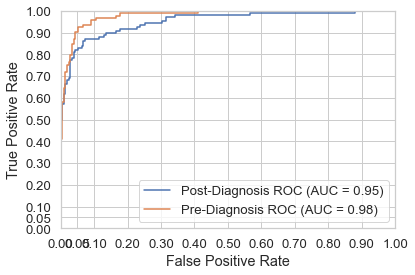

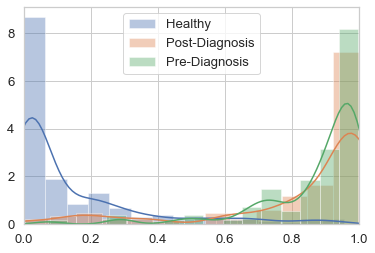

In [95]:
sns.set_style('whitegrid')

y_true = ['Healthy']*len(negative_leavein) + ['Cancer']*len(positive_post_leavein)
y_score = ensemble_score_leavein.loc[negative_leavein+positive_post_leavein]
cur_fpr, cur_tpr, cur_cutoff = roc_curve(y_true, y_score, pos_label='Cancer')
cur_auc = auc(cur_fpr, cur_tpr)
plt.plot(cur_fpr, cur_tpr, label=r'Post-Diagnosis ROC (AUC = %0.2f)' % cur_auc)

y_true = ['Healthy']*len(negative_leavein) + ['Cancer']*len(positive_pre_leavein)
y_score = ensemble_score_leavein.loc[negative_leavein+positive_pre_leavein]
cur_fpr, cur_tpr, cur_cutoff = roc_curve(y_true, y_score, pos_label='Cancer')
cur_auc = auc(cur_fpr, cur_tpr)
plt.plot(cur_fpr, cur_tpr, label=r'Pre-Diagnosis ROC (AUC = %0.2f)' % cur_auc)

plt.xlim([-0.0, 1.0])
plt.ylim([-0.0, 1.0])
plt.xticks([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right");

print("Leave-In Results")
print( "Specificity: %s" % (sum(ensemble_score_leavein.loc[negative_leavein] < 0.581) / len(negative_leavein)))
print( "Post-Diagnosis Sensitivity: %s" % (sum(ensemble_score_leavein.loc[positive_post_leavein] >= 0.581) / len(positive_post_leavein)))
print("Pre-Diagnosis Sensitivity: %s" % (sum(ensemble_score_leavein.loc[positive_pre_leavein] >= 0.581) / len(positive_pre_leavein)))

plt.figure()
sns.distplot(ensemble_score_leavein.loc[negative_leavein])
sns.distplot(ensemble_score_leavein.loc[positive_post_leavein])
sns.distplot(ensemble_score_leavein.loc[positive_pre_leavein])
plt.legend(['Healthy', 'Post-Diagnosis', 'Pre-Diagnosis']);
plt.xlim(0, 1)

### Leave-Out Set Accuracy

Let's compute the leave-out set sensitivity and specificity using the previously chosen cutoff.

Leave-Out Results
Specificity: 0.9565217391304348
Post-Diagnosis Sensitivity: 0.8849557522123894
Pre-Diagnosis Sensitivity: 0.8163265306122449


(0.0, 1.0)

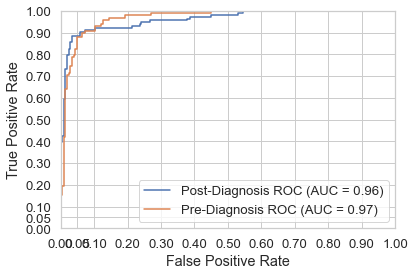

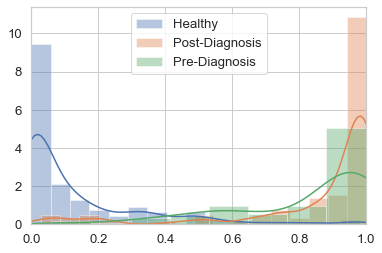

In [96]:
sns.set_style('whitegrid')

y_true = ['Healthy']*len(negative_leaveout) + ['Cancer']*len(positive_post_leaveout)
y_score = ensemble_score_leaveout.loc[negative_leaveout+positive_post_leaveout]
cur_fpr, cur_tpr, cur_cutoff = roc_curve(y_true, y_score, pos_label='Cancer')
cur_auc = auc(cur_fpr, cur_tpr)
plt.plot(cur_fpr, cur_tpr, label=r'Post-Diagnosis ROC (AUC = %0.2f)' % cur_auc)

y_true = ['Healthy']*len(negative_leaveout) + ['Cancer']*len(positive_pre_leaveout)
y_score = ensemble_score_leaveout.loc[negative_leaveout+positive_pre_leaveout]
cur_fpr, cur_tpr, cur_cutoff = roc_curve(y_true, y_score, pos_label='Cancer')
cur_auc = auc(cur_fpr, cur_tpr)
plt.plot(cur_fpr, cur_tpr, label=r'Pre-Diagnosis ROC (AUC = %0.2f)' % cur_auc)

plt.xlim([-0.0, 1.0])
plt.ylim([-0.0, 1.0])
plt.xticks([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right");

print ("Leave-Out Results")
print ("Specificity: %s" % (sum(ensemble_score_leaveout.loc[negative_leaveout] < 0.581) / len(negative_leaveout)))
print ("Post-Diagnosis Sensitivity: %s" % (sum(ensemble_score_leaveout.loc[positive_post_leaveout] >= 0.581) / len(positive_post_leaveout)))
print ("Pre-Diagnosis Sensitivity: %s" % (sum(ensemble_score_leaveout.loc[positive_pre_leaveout] >= 0.581) / len(positive_pre_leaveout)))

plt.figure()
sns.distplot(ensemble_score_leaveout.loc[negative_leaveout])
sns.distplot(ensemble_score_leaveout.loc[positive_post_leaveout])
sns.distplot(ensemble_score_leaveout.loc[positive_pre_leaveout])
plt.legend(['Healthy', 'Post-Diagnosis', 'Pre-Diagnosis']);
plt.xlim(0, 1)

As per Teschendorff et al 2019, the accuracy is similar for the leave-in and leave-out data sets.

## Output Data Table

Let's output a data table containing the scores for each cross-validation.

In [21]:
all_scores_leavein = pd.concat([z_prob_list[index].loc[negative_test_list[index]+positive_pre_test_list[index]+positive_post_test_list[index]]
                                    for index in range(num_models)],
                                   axis=1, sort=True).fillna('Training')
all_scores_leavein['Category'] = ['Leave-In']*all_scores_leavein.shape[0]

all_scores_leaveout = pd.concat([z_prob_list[index].loc[negative_leaveout+positive_post_leaveout+positive_pre_leaveout]
                                     for index in range(num_models)],
                                    axis=1, sort=True)
all_scores_leaveout['Category'] = ['Leave-Out']*all_scores_leaveout.shape[0]

all_scores_merged = pd.concat([all_scores_leavein, all_scores_leaveout], axis=0).replace('Training', np.nan).mean(axis=1)

In [22]:
pd.concat([all_scores_leavein, all_scores_leaveout], axis=0).to_csv('out/tsh_analysis_20191107_cxval_score_table.tsv')

Let's also compute the final merged score for each sample by taking the average across all 1000 cross-validations:

In [23]:
pd.DataFrame(pd.concat([all_scores_leavein, all_scores_leaveout], axis=0).replace('Training', np.nan).mean(axis=1)).to_csv('out/tsh_analysis_20191107_final_score_table.tsv')

These scores were utilized to generate the other figures in the manuscript.